<a href="https://colab.research.google.com/github/Satyake/ZTM-Pytorch-Daniele-instructor-/blob/main/Classification_PT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
device='cuda' if torch.cuda.is_available() else 'cpu'

In [7]:
import torch
import pandas as pd 
data=pd.read_csv('/content/heart_failure_clinical_records_dataset.csv')

FileNotFoundError: ignored

In [5]:
data.head(1)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.0,1.9,130,1,0,4,1


In [6]:
y=data.iloc[:,-1].values
x=data.iloc[:,:-1].values

In [7]:
data['DEATH_EVENT'].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [8]:
x=torch.from_numpy(x).type(torch.float32)
y=torch.from_numpy(y).type(torch.float32)

In [9]:
x.shape,y.shape

(torch.Size([299, 12]), torch.Size([299]))

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [11]:
x_train.shape,y_train.shape
x_test.shape,y_test.shape

(torch.Size([60, 12]), torch.Size([60]))

In [12]:
#model
device='cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [13]:
x_train=x_train.to(device)
y_train=y_train.to(device)

In [14]:
x_train.shape

torch.Size([239, 12])

In [15]:
y_train

tensor([0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
        1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1.,
        1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
        0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1.,
        1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1.,
        1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
        1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
        0., 1., 1., 0., 0., 0., 0., 0., 

In [19]:
from torch import nn

In [20]:
class NN(nn.Module):
  def __init__(self):
    super(). __init__()
    self.l1=nn.Linear(in_features=12,out_features=100)
    self.l2=nn.Linear(in_features=100,out_features=1)
  def forward(self,x):
    return self.l2(self.l1(x))


In [41]:
def relu(x):
  return torch.maximum(torch.tensor(0),x)

In [38]:
class modelupgrade(nn.Module):
  def __init__(self):
    super().__init__()
    self.l1=nn.Linear(in_features=12, out_features=10)
    self.l2=nn.Linear(in_features=10,out_features=10)
    self.l3=nn.Linear(in_features=10,out_features=1)
    self.relu=nn.ReLU
  def forward(self,x):
    z=self.l1(x)
    z=self.l2(z)
    z=self.l3(z)
    z=self.relu(x)
    return z

In [ ]:
class model_nn_non_linear(nn.Module):
  def __init__(self):
    super().__init__()
    self.l1=nn.Linear(in_features=12,out_features=)

In [39]:
model_upgrade=modelupgrade()
model_upgrade.to(device)

modelupgrade(
  (l1): Linear(in_features=12, out_features=10, bias=True)
  (l2): Linear(in_features=10, out_features=10, bias=True)
  (l3): Linear(in_features=10, out_features=1, bias=True)
)

In [23]:
device='cuda'
model_nn=NN()
model_nn.to(device)

NN(
  (l1): Linear(in_features=12, out_features=100, bias=True)
  (l2): Linear(in_features=100, out_features=1, bias=True)
)

In [34]:
#replicate simpler
model_nn_1= nn.Sequential(
    nn.Linear(in_features=12,out_features=100),
    nn.ReLU(),
    nn.Linear(in_features=100,out_features=1)
    )

In [35]:
model_nn_1.to(device)

Sequential(
  (0): Linear(in_features=12, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=1, bias=True)
)

In [ ]:
#model_nn(x_train)

In [26]:
loss_fn=nn.BCELoss() #requires inputs to have used sigmoid activation
loss_fn=nn.BCEWithLogitsLoss()


In [29]:
optimizer=torch.optim.SGD(params=model_nn_1.parameters(),lr=0.001)

In [27]:
#accuracy function
def accuracy_fn(y_true, y_pred):
  correct=torch.eq(y_true,y_pred).sum().item() # calculate no of items equal
  acc=(correct/len(y_pred))*100
  return acc

In [ ]:
next

In [40]:
#training the NN
x_train,y_train=x_train.to(device),y_train.to(device)
x_test,y_test=x_test.to(device),y_test.to(device)
epochs=1000

for e in range(epochs):
  model_nn.train()
  #forward pass
  y_logits=model_nn_1(x_train).squeeze() #removing the extra dimension
  y_pred=torch.round(torch.sigmoid(y_logits)) #turn logits to labels

  #calculate loss
  loss=loss_fn(y_logits,y_train) #nn.BCEwithLogitsLoss
  acc=accuracy_fn(y_pred,y_train)
   #optim
  optimizer.zero_grad()
   #loss
  loss.backward()
   #optim
  optimizer.step()

  model_nn.eval()
  with torch.inference_mode():
    test_logits=model_nn(x_test).squeeze()
    test_pred=torch.round(torch.sigmoid(test_logits))
    test_loss=loss_fn(test_logits,y_test)
    test_acc=accuracy_fn(test_pred,y_test)
    if e%10==0:
      print(f"Epoch {e} | Loss {loss} | Test Loss {test_loss} | Test Acc {test_acc} | Train Acc {acc}")



Epoch 0 | Loss 1079.8795166015625 | Test Loss 5399.05322265625 | Test Acc 40.0 | Train Acc 69.8744769874477
Epoch 10 | Loss 1079.8795166015625 | Test Loss 5399.05322265625 | Test Acc 40.0 | Train Acc 69.8744769874477
Epoch 20 | Loss 1079.8795166015625 | Test Loss 5399.05322265625 | Test Acc 40.0 | Train Acc 69.8744769874477
Epoch 30 | Loss 1079.8795166015625 | Test Loss 5399.05322265625 | Test Acc 40.0 | Train Acc 69.8744769874477
Epoch 40 | Loss 1079.8795166015625 | Test Loss 5399.05322265625 | Test Acc 40.0 | Train Acc 69.8744769874477
Epoch 50 | Loss 1079.8795166015625 | Test Loss 5399.05322265625 | Test Acc 40.0 | Train Acc 69.8744769874477
Epoch 60 | Loss 1079.8795166015625 | Test Loss 5399.05322265625 | Test Acc 40.0 | Train Acc 69.8744769874477
Epoch 70 | Loss 1079.8795166015625 | Test Loss 5399.05322265625 | Test Acc 40.0 | Train Acc 69.8744769874477
Epoch 80 | Loss 1079.8795166015625 | Test Loss 5399.05322265625 | Test Acc 40.0 | Train Acc 69.8744769874477
Epoch 90 | Loss 1079

In [14]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

In [9]:
num_classes=4
num_features=2
random_seed=42

x_blob,y_blob=make_blobs(n_samples=1000,
                         n_features=num_features,
                         centers=num_classes,
                         random_state=random_seed)

In [10]:
x_blob=torch.from_numpy(x_blob).type(torch.float)
y_blob=torch.from_numpy(y_blob).type(torch.LongTensor)

In [15]:
x_blob_train,x_blob_test,y_train_blob,y_test_blob=train_test_split(x_blob,y_blob, test_size=0.4)

In [16]:
x_blob_train.shape,x_blob_test.shape

(torch.Size([600, 2]), torch.Size([400, 2]))

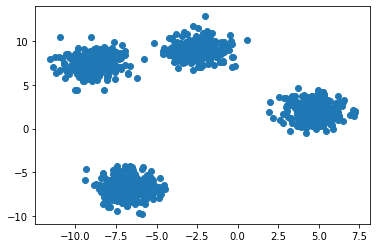

In [17]:
import matplotlib.pyplot as plt

plt.scatter(x_blob[:,0],x_blob[:,1])

In [18]:
import torch
from torch import nn

In [19]:
class model_blob(nn.Module):
  def __init__(self, input_features,output_features,hidden_units=8):
    super().__init__()
    self.linear_layer_stack=nn.Sequential(
        nn.Linear(in_features=input_features,out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,out_features=output_features)
    )

  def forward(self,x):
    return self.linear_layer_stack(x)

model=model_blob(input_features=2, output_features=4,hidden_units=8)
model.to(device)


model_blob(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [20]:
torch.unique(y_train_blob)

tensor([0, 1, 2, 3])

In [21]:
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model.parameters(),lr=0.01)

In [22]:
device='cuda' if torch.cuda.is_available() else 'cpu'

In [23]:
model.eval()
with torch.inference_mode():
  y_pred=model(x_blob_test.to(device))
y_pred

tensor([[ 0.0222,  0.3182, -0.1899, -0.3862],
        [-0.1318,  0.0062,  0.0867, -0.0267],
        [-0.0745, -0.0401,  0.0237, -0.0370],
        ...,
        [ 0.0784,  0.3707, -0.2202, -0.4608],
        [-0.1715,  0.2214,  0.1745, -0.1998],
        [-0.1712,  0.2194,  0.1739, -0.2022]], device='cuda:0')

In [24]:
x_blob_train

tensor([[-2.1983, 10.4896],
        [-6.1715, -5.9234],
        [ 4.4089,  2.6694],
        ...,
        [-2.7016,  9.3158],
        [-8.9267,  6.9535],
        [-8.5712,  7.8322]])

In [25]:
torch.softmax(y_pred,dim=1)  #softmax probabilities

tensor([[0.2619, 0.3521, 0.2119, 0.1741],
        [0.2221, 0.2549, 0.2763, 0.2467],
        [0.2394, 0.2478, 0.2642, 0.2486],
        ...,
        [0.2729, 0.3655, 0.2024, 0.1592],
        [0.2055, 0.3044, 0.2904, 0.1997],
        [0.2058, 0.3041, 0.2906, 0.1995]], device='cuda:0')

In [99]:
y_preds=torch.argmax(y_pred,dim=1)
y_preds

tensor([0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 0, 0, 0, 0, 3, 3, 3, 0, 0,
        3, 0, 3, 0, 3, 0, 0, 3, 3, 3, 3, 0, 3, 0, 0, 3, 0, 0, 3, 3, 3, 0, 3, 0,
        0, 3, 3, 0, 3, 0, 0, 0, 0, 0, 0, 3, 3, 0, 3, 0, 0, 3, 3, 3, 3, 0, 0, 3,
        0, 0, 0, 3, 3, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 0, 0,
        0, 3, 0, 3, 0, 0, 3, 3, 0, 0, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 0, 0, 0,
        0, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 0, 0, 3, 3,
        0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 3, 0, 0, 3, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 3, 3, 3, 0, 3, 3, 3, 0, 3, 0, 0, 0, 0,
        3, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 3, 0,
        0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 3, 3, 0, 3, 3, 0, 0, 0, 3, 0, 1, 0,
        0, 0, 3, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 3, 3, 1, 0, 0,
        0, 0, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 0, 3, 0, 0, 0, 0, 3,
        0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0,

In [28]:
epochs=500
torch.cuda.manual_seed(42)
x_blob_train,x_blob_test = x_blob_train.to(device),x_blob_test.to(device),
y_test_blob,y_train_blob=y_test_blob.to(device),y_train_blob.to(device)
for e in range(epochs):
  model.train()
  out=model(x_blob_train)
  #print(out.shape)
  #print(y_train_blob.shape)
  out=torch.softmax(out,dim=1)
  loss=loss_fn(out,y_train_blob)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  model.eval()
  with torch.inference_mode():
    test_out=model(x_blob_test)
    test_pred=torch.argmax(torch.softmax(test_out,dim=1),dim=1)
    loss_test=loss_fn(test_out,y_test_blob)
    accuracy=accuracy_fn(test_pred,y_test_blob)
    if e%10==0:
      print(f'Epoch :{e} | test_accuracy {accuracy} | train_loss{loss} | test_loss{loss_test}')


Epoch :0 | test_accuracy 10.25 | train_loss1.4136881828308105 | test_loss1.5143945217132568
Epoch :10 | test_accuracy 14.75 | train_loss1.4081814289093018 | test_loss1.4904632568359375
Epoch :20 | test_accuracy 17.0 | train_loss1.4027248620986938 | test_loss1.4673466682434082
Epoch :30 | test_accuracy 19.75 | train_loss1.3973259925842285 | test_loss1.4450006484985352
Epoch :40 | test_accuracy 22.25 | train_loss1.3919703960418701 | test_loss1.423399806022644
Epoch :50 | test_accuracy 26.0 | train_loss1.3866395950317383 | test_loss1.4023542404174805
Epoch :60 | test_accuracy 35.75 | train_loss1.381274700164795 | test_loss1.3816241025924683
Epoch :70 | test_accuracy 41.75 | train_loss1.37590491771698 | test_loss1.3613018989562988
Epoch :80 | test_accuracy 45.75 | train_loss1.3704960346221924 | test_loss1.341331958770752
Epoch :90 | test_accuracy 47.0 | train_loss1.3650132417678833 | test_loss1.321641445159912
Epoch :100 | test_accuracy 47.25 | train_loss1.3594313859939575 | test_loss1.302

In [ ]:
y_test_blob

In [ ]:
test_pred

In [112]:
y_train_blob.shape


torch.Size([400])

In [ ]:
y_train_blob

In [41]:
!pip install torchmetrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 517.2/517.2 KB 10.2 MB/s eta 0:00:00


In [42]:
from torchmetrics import Accuracy

In [36]:
with torch.inference_mode():
  y_pred_probs=torch.argmax(torch.softmax(model(x_blob_test),dim=1),dim=1)
y_pred_probs
from sklearn.metrics import accuracy_score
accuracy_score(y_pred_probs.cpu(),y_test_blob.cpu())

0.745